In [1]:
import numpy as np
import pandas as pd

In [6]:
df_can = pd.read_excel('./dataset/Canada.xlsx', sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName': 'Region'}, inplace=True)
df_can['total'] = df_can.sum(axis=1)
df_can.set_index('Country', inplace=True)
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980,2014)))

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

mpl.style.use(['ggplot'])

In [10]:
!conda install -c conda-forge wordcloud --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\950351\anaconda3

  added / updated specs:
    - wordcloud


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.9.2                |   py38haa244fe_0         3.1 MB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    wordcloud-1.8.1            |   py38h294d835_1         196 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/win-64::python_abi-3.8-1_cp38
  wordcloud          conda-forge/win-64::wordcloud-1.8.1-py38h294d835_1

The following packages will be UPDATED:

  conda                        anaconda::conda-4.9.0-py38_0 --> conda-forge::conda-4.9.2-py38haa244fe_0




pyth

In [11]:
print('Workcloud is installed and imported!')

Workcloud is installed and imported!


In [14]:
from wordcloud import WordCloud, STOPWORDS

In [12]:
alice_novel = open('dataset/alice_novel.txt', 'r').read()

In [15]:
stopwords = set(STOPWORDS)

In [18]:
alice_wc = WordCloud( background_color='White', max_words=2000, stopwords=stopwords)

alice_wc.generate(alice_novel)

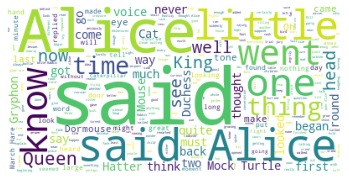

In [20]:
plt.imshow(alice_wc)
plt.axis('off')
plt.show()

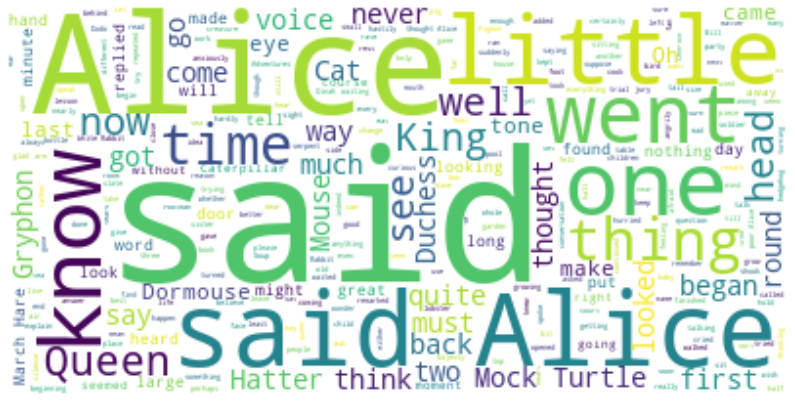

In [24]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

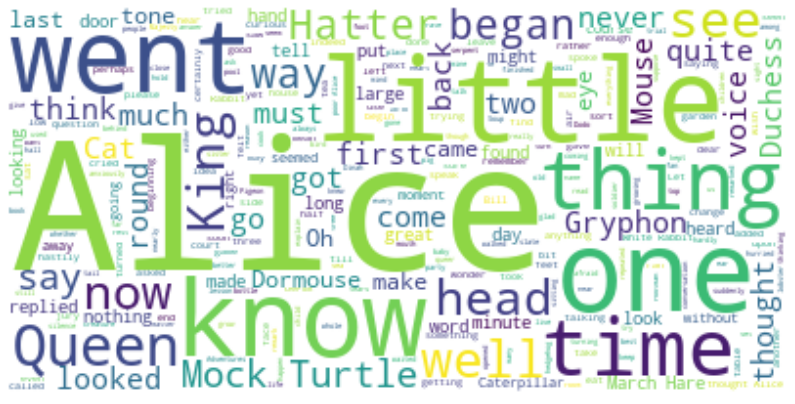

In [25]:
stopwords.add('said')
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
!pip install seaborn

In [27]:
import seaborn as sns

In [28]:
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


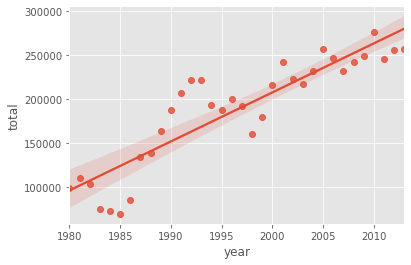

In [29]:
sns.regplot(x='year', y='total', data=df_tot)

## Folium

In [30]:
!pip install folium

In [31]:
import folium

In [33]:
world_map = folium.Map()

In [43]:
world_map = folium.Map(location=[-6.8701913, 107.5796431], zoom_start=10)
world_map

In [47]:
world_map = folium.Map(location=[-6.8701913, 107.5796431], zoom_start=12, tiles='Stamen Terrain')
world_map